## ANN Multilayer

In [27]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [40]:
nPerCluster = 100
blur = 1

A = [1,3]
B = [1,-2]

# generate data
a = [A[0]+np.random.randn(nPerCluster)*blur, A[1]+np.random.randn(nPerCluster)*blur]
b = [B[0]+np.random.randn(nPerCluster)*blur, B[1]+np.random.randn(nPerCluster)*blur]

labels_np = np.vstack((np.zeros((nPerCluster,1)),np.ones((nPerCluster,1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

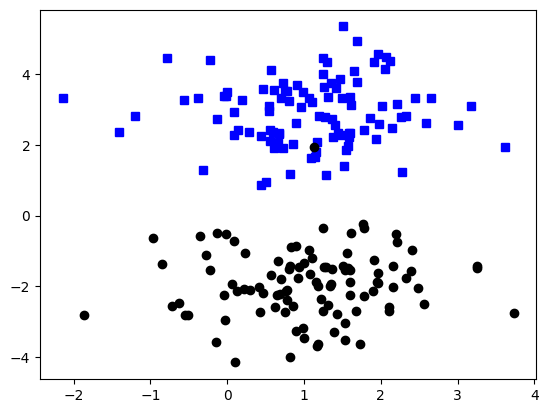

In [41]:
plt.plot(a[0],a[1] ,"bs")
plt.plot(b[0],b[1], "ko")

In [42]:
def createANNmodel(lr):
    
    ANNclassify = nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,1),
        nn.ReLU(),
        nn.Linear(1,1),
        nn.Sigmoid()
    )
    
    lossfun = nn.BCELoss()
    
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=lr)
    return ANNclassify, lossfun, optimizer


epochs = 1000
def trainModel(ANN):
    losses = torch.zeros(epochs)
    
    for epoch in range(epochs):
    
        y_pred = ANN(data)
    
        loss = lossfun(y_pred, labels)
        losses[epoch] = loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    predictions = ANN(data)
    
    totalacc = 100*torch.mean(((predictions>0.5) == labels).float())
    
    return losses, predictions, totalacc

In [43]:
ANNclassify, lossfun, optimizer = createANNmodel(.01)

losses, preds, acc = trainModel(ANNclassify)

acc

tensor(99.5000)

In [ ]:
lrs = np.linspace(.001,.1,50)

accByLR = []

allLosses = np.zeros((len(lrs), epochs))

for i, lr in enumerate(lrs):
    
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses, preds, acc = trainModel(ANNclassify)
    
    accByLR.append(acc)
    allLosses[i] = losses.detach()   
    
allLosses 

array([[0.70794374, 0.70784432, 0.70774496, ..., 0.63948518, 0.63941169,
        0.63933825],
       [0.64847732, 0.64808011, 0.64768267, ..., 0.32497668, 0.32481587,
        0.32465523],
       [0.86174619, 0.84758651, 0.83374673, ..., 0.4935286 , 0.49321747,
        0.49290603],
       ...,
       [0.67798126, 0.67252243, 0.66665208, ..., 0.04329766, 0.04328388,
        0.04327006],
       [0.8749119 , 0.80225378, 0.7540068 , ..., 0.69314718, 0.69314718,
        0.69314718],
       [0.75465554, 0.64285582, 0.61898673, ..., 0.04072749, 0.04071439,
        0.04070113]], shape=(50, 1000))

In [45]:
np.max(accByLR)

np.float32(99.5)

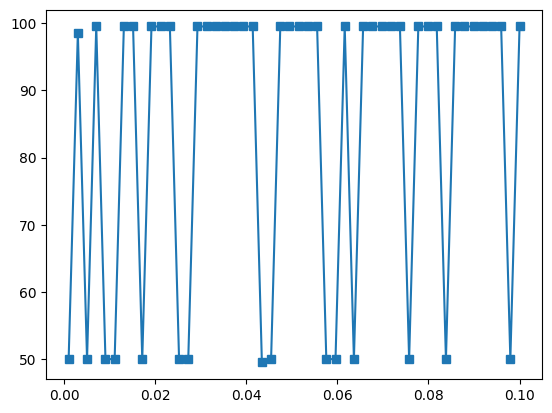

In [46]:
plt.plot(lrs, accByLR, "s-")

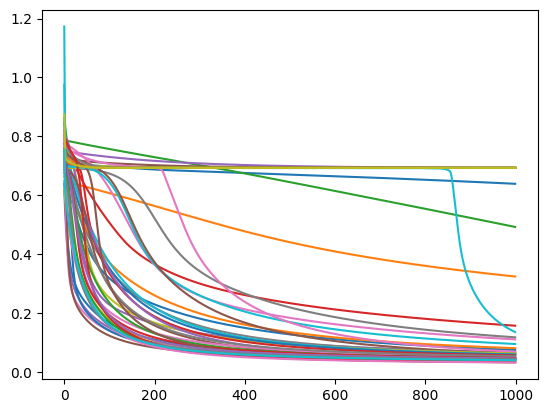

In [47]:
plt.plot(allLosses.T)

In [ ]:
def createANNmodel(lr):
    
    ANNclassify = nn.Sequential(
        nn.Linear(2,16),
        # nn.ReLU(),
        nn.Linear(16,1),
        # nn.ReLU(),
        nn.Linear(1,1),
        nn.Sigmoid()
    )
    
    lossfun = nn.BCELoss()
    
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=lr)
    return ANNclassify, lossfun, optimizer


epochs = 1000
def trainModel(ANN):
    losses = torch.zeros(epochs)
    
    for epoch in range(epochs):
    
        y_pred = ANN(data)
    
        loss = lossfun(y_pred, labels)
        losses[epoch] = loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    predictions = ANN(data)
    
    totalacc = 100*torch.mean(((predictions>0.5) == labels).float())
    
    return losses, predictions, totalacc

lrs = np.linspace(.001,.1,50)

accByLR = []

allLosses = np.zeros((len(lrs), epochs))


for i, lr in enumerate(lrs):
    
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses, preds, acc = trainModel(ANNclassify)
    
    accByLR.append(acc)
    allLosses[i] = losses.detach()   
    
allLosses 


array([[0.74754792, 0.74395484, 0.74039114, ..., 0.09781203, 0.09772634,
        0.09764082],
       [0.74446768, 0.73747009, 0.73059058, ..., 0.05581961, 0.05578422,
        0.05574891],
       [0.91788375, 0.91472661, 0.91165406, ..., 0.04501329, 0.04498315,
        0.04495313],
       ...,
       [0.87419021, 0.5026536 , 0.32579106, ..., 0.03127947, 0.03127946,
        0.03127946],
       [0.6622746 , 0.37143558, 0.2726534 , ..., 0.03127941, 0.03127941,
        0.03127941],
       [0.58998942, 0.48405412, 0.39718568, ..., 0.03128738, 0.03128734,
        0.03128732]], shape=(50, 1000))

In [49]:
np.max(accByLR)

np.float32(99.5)

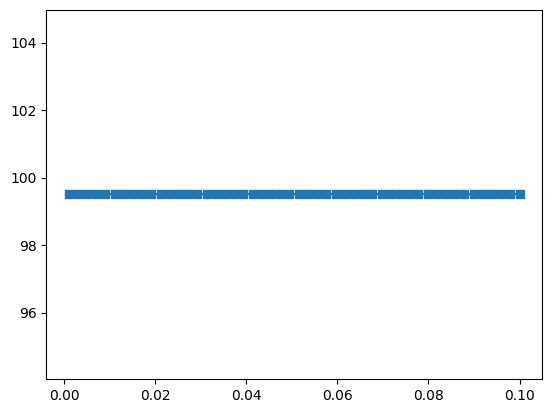

In [50]:
plt.plot(lrs, accByLR, "s-")

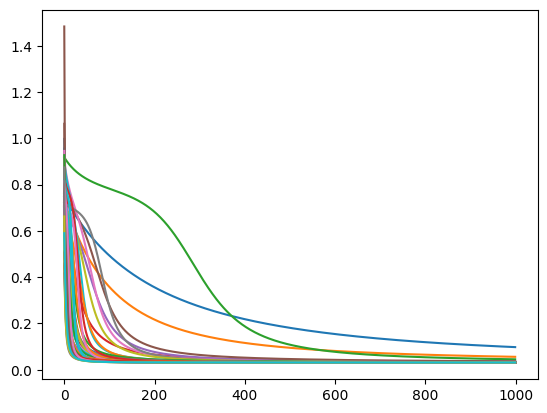

In [51]:
plt.plot(allLosses.T)